# **TP1 - Sistemas de Inteligencia Artificial**
## Regresión con Modelos Lineales
#### Dataset: Properati Bs. As. 2020 ([Kaggle](https://www.kaggle.com/datasets/alejandromendivil/bsas-realstate-on-sale/))

 **Trabjaremos con modelos lineales**

Son aquellos que tienen la forma:

$\hat{y} =\theta_0 +\theta_1 x_1 + \theta_2 x_2 + .. +\theta_n x_n$

o, vectorialmente

$\hat{y} = \vec{\theta} \cdot \vec{x}$

donde $\hat{y}$ es la predicción,
$n$ es el número de _features_ o variables predictoras, $x_i$ es el i-ésimo feature y $\vec{\theta}$ es el vector de parámetros o _pesos_ del modelo (lo que entrenamos).

**Modelos lineales regularizados**

En los modelos lineales simples, los parámetros $\theta_i$ se ajustan minimizando el error cuadrático medio entre las predicciones y los valores reales. Sin embargo, cuando hay **muchas variables**, correlaciones fuertes entre ellas o riesgo de *overfitting*, se utilizan **términos de regularización** que penalizan la magnitud de los coeficientes, mejorando así la capacidad de generalización del modelo.

Algunos ejemplos:

- **Ridge Regression** (*L2 regularization*):  

  $\text{Loss} = \text{MSE} + \alpha \sum_{i=1}^n \theta_i^2$

  Tiende a mantener todos los coeficientes pequeños pero distintos de cero.

- **Lasso Regression** (*L1 regularization*):  

  $\text{Loss} = \text{MSE} + \alpha \sum_{i=1}^n |\theta_i|$

  Puede forzar coeficientes exactamente a cero, funcionando también como método de selección de variables.

- **Elastic Net**: combina L1 y L2, balanceando sus ventajas.


**Modelos lineales con *features* polinomiales**

Los modelos lineales pueden extenderse para capturar relaciones **no lineales** entre las variables de entrada y la variable objetivo mediante la creación de nuevas variables que son **combinaciones polinomiales** de las originales.

Por ejemplo, con dos variables $x_1$ y $x_2$ y un polinomio de grado 2, el modelo considera:  
$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2
$  

Aunque la relación entre las *features* y $\hat{y}$ puede ser no lineal, el modelo sigue siendo **lineal en los parámetros** $\theta_i$, por lo que conserva las propiedades y métodos de ajuste de los modelos lineales clásicos.

Este enfoque, combinado con regularización, permite capturar patrones complejos sin perder el control sobre el sobreajuste.


------------------------
------------------------
**Instrucciones:**

- **No** modificar las celdas de texto.

- Resolver cada consigna en su sección correspondiente. Pueden sumar celdas de código y texto si lo consideran necesario. Recuerden que lo más importante es el razonamiento y la justificación de los pasos para demostrar comprensión del problema a resolver.

- **ENTREGA:** Ir a Archivo > Descargar .ipynb. Este archivo .ipynb deberán subirlo al campus junto con las diapositivas en formato PDF (archivo no editable) hasta las 23:59hs del día anterior a la presentación. La presentación oral de este último documento será de manera grupal en hasta 10 minutos el día 08/09 durante el horario de clase (se sorteará el orden de los grupos al azar). Dado el tiempo de exposición, recomendamos un máximo de 5 diapositivas.

------------------------
------------------------

# 1. Importar librerías

In [2]:
# las librerías escenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Definir el problema

- **¿Cuál es la tarea que queremos hacer con aprendizaje automático?**
  - Predecir el precio de las propiedades.
- **¿Qué métrica de evaluación vamos a usar?**
  - Utilizaremos el RMSE (_root mean squared error_).


# 3. Cargar los datos

In [3]:
# Cargamos el dataset de Kaggle
import kagglehub
import os

path = kagglehub.dataset_download("alejandromendivil/bsas-realstate-on-sale")
csv_file_path = os.path.join(path, 'bsas_realstate_on_sale_properati_dataset_2020.csv')

df = pd.read_csv(csv_file_path) # lo guardamos en un DataFrame de pandas

# 4.  Análisis exploratorio de datos

Acá comienzan ustedes..
- 4.1) **Conocer los datos**
  - Explorar la estructura del dataset: cantidad de columnas y filas, tipos de datos, entender qué significa cada variable (métodos relevantes: `head()`, `info()`, `describe()`).

- 4.2) **Valores faltantes**
  - Calcular el porcentaje de valores nulos por columna.
  - Decidir si se imputan, se eliminan o se dejan según la estrategia de preprocesamiento.

- 4.3) **Distribuciones de variables y valores atípicos**
  - Graficar histogramas, boxplots o violinplots para variables numéricas.
  - Identificar valores atípicos y limpiarlos de ser necesario.
  - Graficar conteos para variables categóricas (sug: `value_counts()` o `sns.countplot()`).

- 4.4) **Relaciones entre variables**
  - Graficar diagramas de dispersión entre variables relevantes y el precio (sug: `scatterplot()`, `sns.pairplot()`).
  - Calcular matriz de correlación y visualizar (sug: `imshow` o `sns.heatmap()`).

### 4.1) **Conocer los datos**:
Explorar la estructura del dataset: cantidad de columnas y filas, tipos de datos, entender qué significa cada variable (métodos relevantes: `head()`, `info()`, `describe()`).
- El dataset tiene 146.660 filas y 19 columnas.
- Tipos de datos: 8 numéricas (float64) y 11 de texto/categóricas (object).

In [4]:
# 4.1 Conocer los datos
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07




**Variables principales:**

- Fechas: start_date, end_date, created_on → deberían ser datetime.

- Ubicación: lat, lon (numéricas), l1, l2, l3 (categóricas).

- Características del inmueble: rooms, bedrooms, bathrooms, surface_total, surface_covered (numéricas).

- Precio: price (numérica), currency (categórica).

- Descripción: title, description (texto).

- Clasificación: property_type, operation_type (categóricas).

Se puede usar head() para ver ejemplos (se puede elegir cuantos ejemplos se quieren ver), info() para tipos y nulos, y describe() para estadísticas de las numéricas. Una acaclaración más, las que estan descriptas como categóricas, se sospecha que estas son, proximamente se evaluara correctamente si realmente son categóricas.


### 4.2)  **Valores faltantes**
  - Calcular el porcentaje de valores nulos por columna.
  - Decidir si se imputan, se eliminan o se dejan según la estrategia de preprocesamiento. FALTA ESTA DECISION

In [5]:
# 4.2) Valores faltantes
print(df.isnull().sum())

print()
# Porcentaje de nulos por columna
print('Porcentaje de nulos por columna:')
print(df.isnull().mean() * 100)


start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Porcentaje de nulos por columna:
start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description   

Según los datos podemos concluir:

- lat y lon (~7% nulos): podrían imputarse con la mediana o eliminar filas si son pocas.

- bathrooms (4.06% nulos): imputar con la mediana.

- surface_total (13.99% nulos) y surface_covered (14.73% nulos): imputar con mediana o eliminar si no son críticas.

### 4.3)  **Distribuciones de variables y valores atípicos**
  - Graficar histogramas, boxplots o violinplots para variables numéricas.
  - Identificar valores atípicos y limpiarlos de ser necesario.
  - Graficar conteos para variables categóricas (sug: `value_counts()` o `sns.countplot()`).

In [12]:
#4.3.3 cuales son las variables categóricas

# Count the number of columns
num_columns = df.shape[1]
print(f"Numero de columnas: {num_columns}\n")

# Count unique values per column
print("Numero de valores unicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Numero de columnas: 19

Numero de valores unicos por columna:
start_date: 366
end_date: 412
created_on: 366
lat: 59636
lon: 60075
l1: 1
l2: 4
l3: 89
rooms: 25
bedrooms: 16
bathrooms: 14
surface_total: 1843
surface_covered: 876
price: 6821
currency: 1
title: 77733
description: 106668
property_type: 10
operation_type: 1


In [8]:
#4.3 Un metodo medio falopa para ver todo
date_cols = ['start_date', 'end_date', 'created_on']

categorical_cols = []
numeric_continuous_cols = []

for col in df.columns:
    if col in date_cols:
        continue  # excluimos fechas
    elif df[col].dtype == 'object' or df[col].dtype.name == 'category':
        categorical_cols.append(col)
    else:
        # Numéricas discretas con pocos valores únicos: categóricas
        if df[col].nunique() < 10:
            categorical_cols.append(col)
        else:
            numeric_continuous_cols.append(col)

print("Variables categóricas:", categorical_cols)
print("Variables numéricas continuas:", numeric_continuous_cols)




Variables categóricas: ['l1', 'l2', 'l3', 'currency', 'title', 'description', 'property_type', 'operation_type']
Variables numéricas continuas: ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']


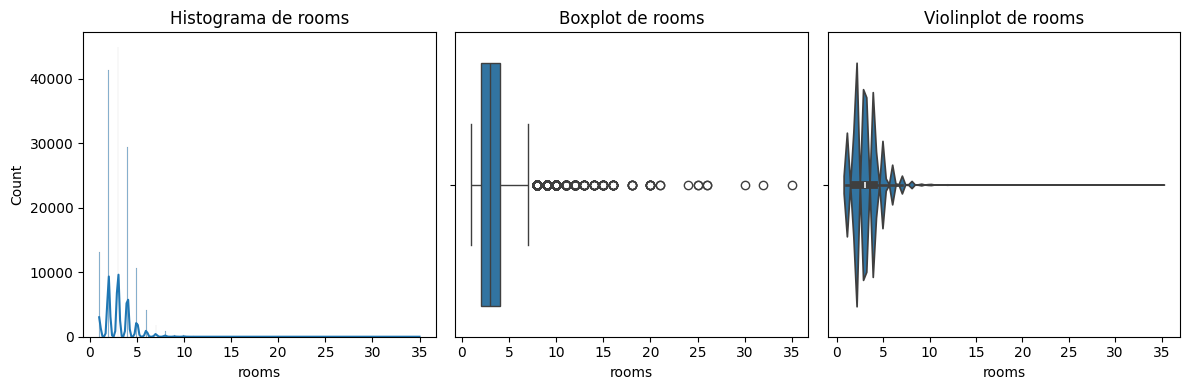

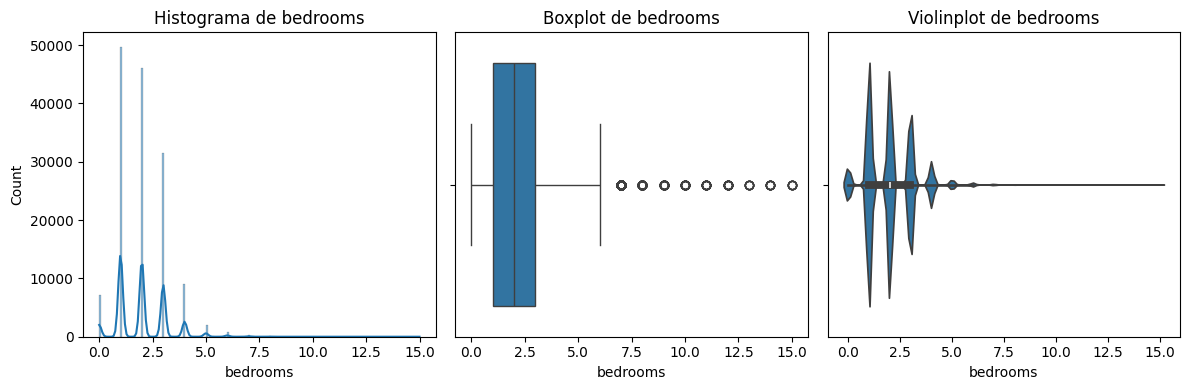

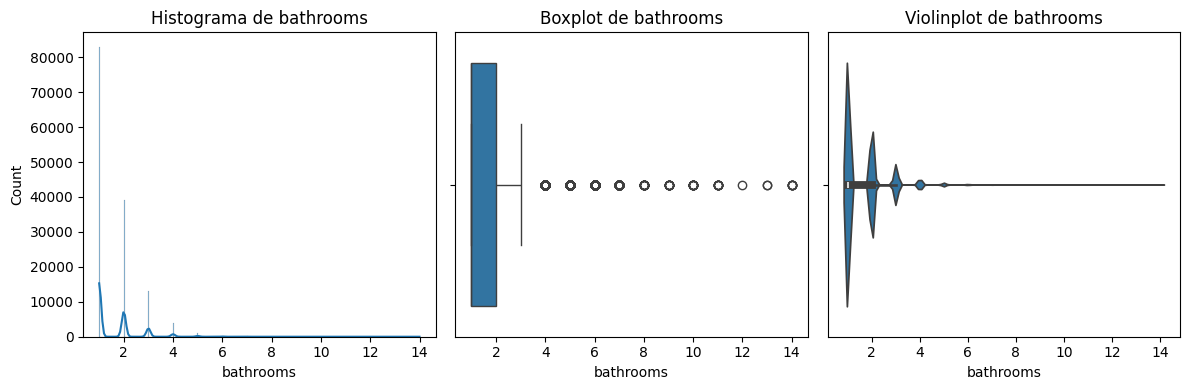

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7cd9ca286660> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#4.3

# Variables
num_vars = ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','lat','lon']
cat_vars = ['l1','l2','l3','currency','property_type','operation_type']

# -----------------------------
# 1. Visualización y outliers
# -----------------------------
for col in num_vars:
    plt.figure(figsize=(12,4))

    # Histograma
    plt.subplot(1,3,1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histograma de {col}')

    # Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

    # Violinplot
    plt.subplot(1,3,3)
    sns.violinplot(x=df[col])
    plt.title(f'Violinplot de {col}')

    plt.tight_layout()
    plt.show()

# Recorte de outliers (1%-99% percentil)
for col in ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# -----------------------------
# 2. Conteos para categóricas
# -----------------------------
for col in cat_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Conteo por {col}')
    plt.show()


# 5. Preparar los datos para modelos de ML

- 5.1) **Selección de variables**
  - Identificar variables numéricas y categóricas.
  - Identificar si hay columnas irrelevantes o redundantes.
  - Opcional: Aplicar ingeniería de features (ej: transformaciones o nuevas variables a partir de las presentes).
  - Seleccionar un conjunto prometedor de variables predictoras.

- 5.2) **Codificación de variables categóricas**
  - Usar `OneHotEncoder` o `OrdinalEncoder`  para variables categóricas (decidir cual).

- 5.3) **Imputación de valores faltantes**
  - Imputar valores faltantes si hay. Decidir qué estrategia de imputación usar para variables numéricas y para categóricas (sug: `SimpleImputer`).

- 5.4) **Separación de datos**
  - Crear los conjuntos de entrenamiento y testeo `X_train`, `X_test`, `y_train`, `y_test` (sug: `train_test_split`).

- 5.5) **Escalado de variables numéricas**
  - Normalizar las variables numéricas (sug: `StandardScaler`).


In [ ]:
# su código

# 6. Entrenamiento


- 6.1) **Probar al menos 4 modelos distintos**
  - Ej: Regresión lineal simple (`LinearRegression`), Ridge Regression (`Ridge`), Lasso Regression (`Lasso`).
  - Probar modelos con regresión polinomial usando `PolynomialFeatures`.
  - Ir siempre de lo más simple a lo más complejo.

- 6.2) **Evaluar y comparar**
  - Evaluar los modelos **solo** en el conjunto de entrenamiento mediante validación cruzada usando `cross_val_score`.

In [ ]:
# su código

# 7. Ajuste fino



- 7.1) **Buscar los mejores hiperparámetros**
  - Para los modelos con hiperparámetros (como `alpha`  y/o `degree`), hacer un ajuste fino por validación cruzada (sug: `GridSearch` o `RandomizedSearch`).
  - Elegir el modelo final basandose en las métricas de validación cruzada. Hacer un gráfico de barras comparando el RMSE de validación de los modelos comparados.
  - Especificar cuál es el modelo elegido, sus hiperparámetros y variables de entrada (*features*).

In [ ]:
# su código

# 8. Testeo

- 8.1) **Finalmente, evaluar el modelo final en el conjunto de testeo**
  - Calcular el RMSE del modelo final (en test) y visualizar predicciones vs valores reales en un scatterplot.
  - ¿Cuáles fueron las features más importantes?, ¿Pueden hacer alguna interpretación?

In [ ]:
# su código